In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import re

Get filenames

In [2]:
base_path = "G:\\Data\\Projects\\NbSe2\\AC studies\\"
hechos = glob.glob(base_path + "Set A\\*_pulsed_measurement.dat")

Analyse PODMR

Analyse HEcho

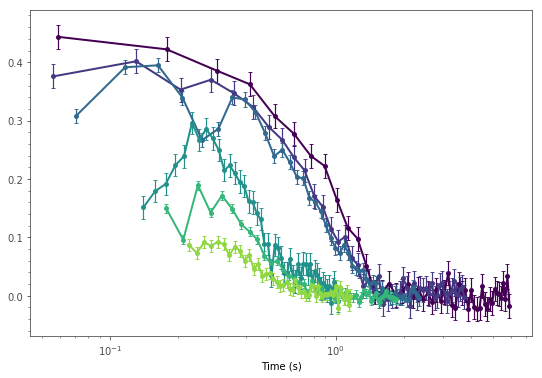

Traceback (most recent call last):
  File "C:\Users\yy3\Documents\Software\qudi\logic\jupyterkernel\qzmqkernel.py", line 679, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-735ed94bb27c>", line 5, in <module>
    PB = qudi_pulse_block(pi_pulse=pi_pulse, pi_half_pulse=pi_half_pulse, three_pi_half_pulse=three_pi_half_pulse, LO_freq=LO_freq, target_freq=target_freq, power=power)
NameError: name 'pi_half_pulse' is not defined


In [23]:
import matplotlib

hecho_meas0 = np.zeros(len(hechos))
hecho_meas0_err = np.zeros(len(hechos))
hecho_meas1 = np.zeros(len(hechos))
temp = np.zeros(len(hechos))

N = np.array([1,2,4,32,64,128])

cmap = matplotlib.cm.get_cmap('viridis')
norm = matplotlib.colors.Normalize(vmin=0, vmax=len(hechos))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')

for i in range(len(hechos[:])):
    rgba = cmap(norm(i))
    path = hechos[i]
    data_raw = np.loadtxt(path).T
    
    var_list = data_raw[0]

    mode = 'exp_decay_stretched'
    plot_option = 3 #1 = Signal1, 2 = Signal2, 3 = delta of signals
    err = None

    #Choose what to plot
    if plot_option == 3:
        data = data_raw[1] - data_raw[2]
        shift = (data_raw.shape[0]-1)//2
        err1 = abs(data_raw[1+shift])
        err2 = abs(data_raw[2+shift])
        err = err1+err2
    else:
        data = data_raw[plot_option]
        shift = (data_raw.shape[0]-1)//2
        err = data_raw[plot_option+shift]

#     plt.title(f"{temp[i]}")

    plt.xlabel('Frequency (Hz)')

    #Determine fi
    if mode == 'exp_decay':
        fit = afm_scanner_logic._fitlogic.make_decayexponential_fit(var_list,data,estimator=afm_scanner_logic._fitlogic.estimate_decayexponential)
        lm,_ = fitlogic.make_decayexponential_model()
        leg = f"Lifetime ({mode}): {round(fit.params['lifetime']*1e6,2)} us +- {round(fit.params['lifetime'].stderr*1e6,2)} us"
        plt.xlabel('Time (s)')
        
    if mode == 'exp_decay_stretched':
        fit = afm_scanner_logic._fitlogic.make_decayexponentialstretched_fit(var_list,data,estimator=afm_scanner_logic._fitlogic.estimate_decayexponentialstretched)
        lm,_ = fitlogic.make_decayexponentialstretched_model()
        leg = f"Lifetime ({mode}): {round(fit.params['lifetime']*1e6,2)} us +- {round(fit.params['lifetime'].stderr*1e6,2)} us"
        plt.xlabel('Time (s)')


    #Plot Data an
    t2 = fit.params['lifetime']
    var_list *= 1/N[i]**(2/3)/3.39e-6
    
    if not err is None:
        ax.errorbar(x=var_list, y=data,
                     yerr=err, fmt='-o', color=rgba,
                     capsize=2, capthick=0.9,
                    elinewidth=1.2)
    else:
        ax.plot(var_list,data,'bo',color=rgba)

    x = np.linspace(var_list[0],var_list[-1],10000, endpoint=True)
#     ax.plot(x, lm.eval(fit.params, x=x),'k-',label=leg)

#     ax.legend()

    plt.rcParams['figure.figsize'] = (9, 6)
    fontsize = 12
    # with open(filepath+f'_jupyter_plot_{plot_option}_{mode}.png', 'wb') as f:
    #     plt.savefig(f,format='png',dpi=600)
#     plt.show()
#     hecho_meas0[i] = fit.params['lifetime']*1e6
#     hecho_meas0_err[i] = fit.params['lifetime'].stderr*1e6

plt.show()



In [32]:
plt.style.use('default')
# plt.plot(temp, hecho_meas0)

color1 = (80/255,80/255,255/255)
color2 = (255/255,80/255,80/255)

plt.errorbar(x=temp, y=hecho_meas0,
                     yerr=hecho_meas0_err, fmt='-o', color=color1,
                     capsize=2, capthick=0.9,
                     elinewidth=1.2)

plt.xlabel('Temp. (K)')
plt.ylabel('T2 time ($\mu$s)')
plt.xlim(1.5,10)
plt.ylim(0.2,1.8)

with open(base_path+f'_jupyter_plot_setD1.svg', 'wb') as f:
    plt.savefig(f,format='svg',dpi=700)

plt.show()

In [26]:
print(temp)